   Year  Total_Vehicles_million  Total_EVs     EV_2W    EV_3W    EV_4W  \
0  2025                    12.0   191414.3  163928.6   9742.9  15614.3   
1  2026                    12.6   222650.0  192032.1  10632.1  18217.9   
2  2027                    13.3   253885.7  220135.7  11521.4  20821.4   
3  2028                    14.0   285121.4  248239.3  12410.7  23425.0   
4  2029                    14.6   316357.1  276342.9  13300.0  26028.6   
5  2030                    15.3   347592.9  304446.4  14189.3  28632.1   

   EV_Buses  Emission_Rate  
0     177.1          135.0  
1     204.8          131.1  
2     232.5          127.3  
3     260.2          123.4  
4     287.9          119.6  
5     315.5          115.7  


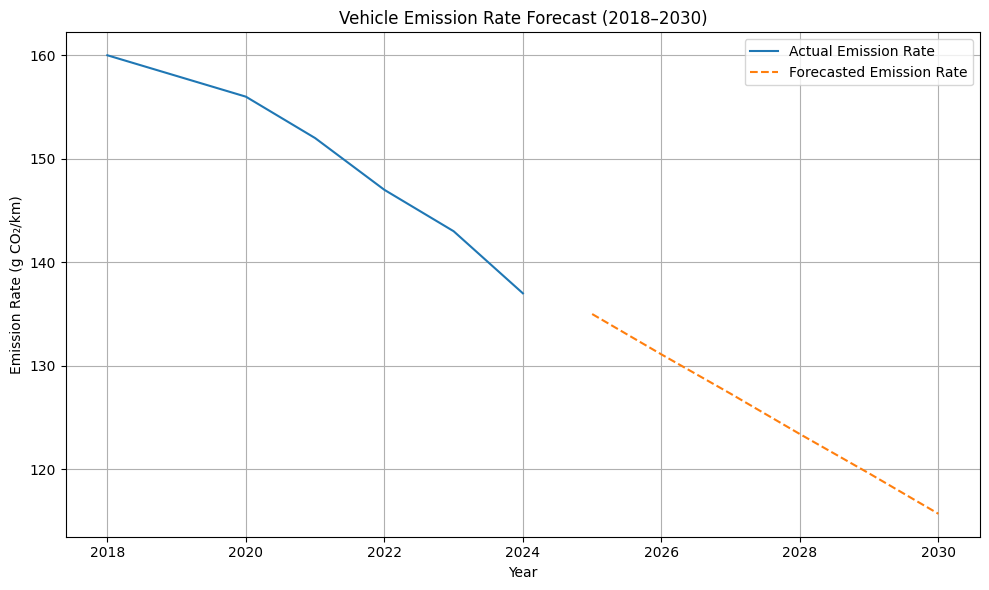

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Actual data from 2018 to 2024
data = {
    'Year': list(range(2018, 2025)),
    'Total_Vehicles_million': [7.4, 8.0, 8.5, 9.2, 10.0, 10.7, 11.3],
    'Total_EVs': [3800, 7500, 14000, 20000, 95000, 155000, 170000],
    'EV_2W': [100, 500, 1800, 3200, 70000, 135000, 150000],
    'EV_3W': [1500, 2800, 5000, 8000, 17000, 4000, 5000],
    'EV_4W': [200, 400, 700, 1100, 7000, 13000, 14000],
    'EV_Buses': [10, 15, 25, 35, 80, 120, 180],
    'Emission_Rate': [160, 158, 156, 152, 147, 143, 137]
}

df = pd.DataFrame(data)

# 2. Forecast for 2025–2030
years_future = list(range(2025, 2031))

def forecast_linear(column):
    x = df['Year']
    y = df[column]
    coeffs = np.polyfit(x, y, 1)  # Linear regression (degree=1)
    forecast = np.polyval(coeffs, years_future)
    return np.round(forecast, 1)

# Apply to each column
forecast_df = pd.DataFrame({'Year': years_future})
forecast_df['Total_Vehicles_million'] = forecast_linear('Total_Vehicles_million')
forecast_df['Total_EVs'] = forecast_linear('Total_EVs')
forecast_df['EV_2W'] = forecast_linear('EV_2W')
forecast_df['EV_3W'] = forecast_linear('EV_3W')
forecast_df['EV_4W'] = forecast_linear('EV_4W')
forecast_df['EV_Buses'] = forecast_linear('EV_Buses')
forecast_df['Emission_Rate'] = forecast_linear('Emission_Rate')

# 3. Display full forecast
print(forecast_df)

# 4. Optional: Plot example trends
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emission_Rate'], label='Actual Emission Rate')
plt.plot(forecast_df['Year'], forecast_df['Emission_Rate'], label='Forecasted Emission Rate', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Emission Rate (g CO₂/km)')
plt.title('Vehicle Emission Rate Forecast (2018–2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


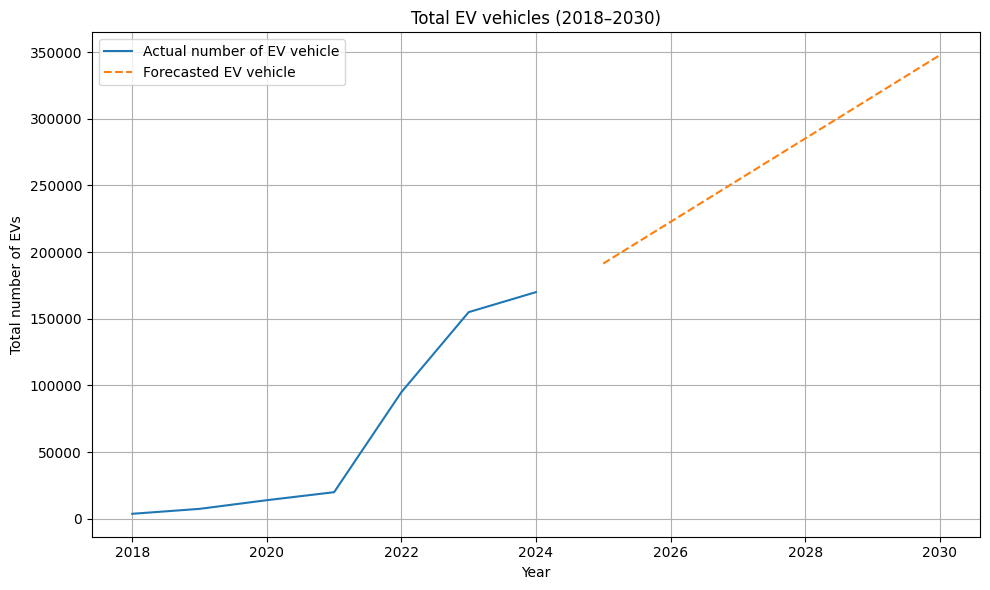

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_EVs'], label='Actual number of EV vehicle')
plt.plot(forecast_df['Year'], forecast_df['Total_EVs'], label='Forecasted EV vehicle', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total number of EVs')
plt.title('Total EV vehicles (2018–2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()